In [1]:
from sympy import *

In [2]:
import heppackv0 as hep

Reading heppackv0.py (March 2023)

Done


In [3]:
print('The CM system is used')
E,E0,M,M1,M2,p,Delta,m=symbols('E E0 M M1 M2 p Delta m',positive=True)
theta,alpha,omega,=symbols('theta alpha omega',real=True)

The CM system is used


We consider neutron decay $n\rightarrow p e^-\bar{\nu_e}$ or $d$ quark decay
$d\rightarrow u e^-\bar{\nu_e}$ in the approximation where the recoil of the
outgoing neutron ($u$ quark) is neglected. Four momentum conservation reads
$k_i=k_f+p'+p_f$. Compared to the book we change the notation:
$m_d\to M,\,$ $m_u\to M_1,\,$ $E'\to E,\,$ $\omega'\to \omega,\,$ and $\theta_e\to \theta\,$.

In [4]:
ki=[M,M,0,0]
ppr=[E,m,theta,0]
kf=[M1,M1,0,0]
pf=[omega,0,0,0]

### 1) Neutrons as elementary fermions
The matrix elements are calculated from
$$T_{{fi}}=\frac{4G_{{\mathrm{F}}}}{\sqrt{2}}\bar{u}(k_f)
\gamma^{\mu}\frac{1-\gamma^{5}}{2}u(k_i)\bar{u}(p')\gamma _{\mu}\frac{1-\gamma^{5}}{2}v(p_f)
\enspace .$$
The weak currents, e.g. $\bar{u}(k_f)\gamma^{\mu}\frac{1-\gamma^{5}}{2}u(k_i)$ are contained in the heppackv0 package. In this ansatz the neutrons are treated as elementary fermions. 

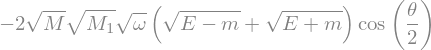

In [5]:
dec11=simplify(hep.dotprod4(hep.ubvw(ppr,-1,pf,1),hep.ubuw(kf,1,ki,1)));dec11

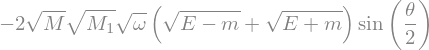

In [6]:
dec12=simplify(hep.dotprod4(hep.ubvw(ppr,-1,pf,1),hep.ubuw(kf,-1,ki,1)));dec12

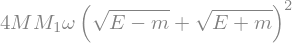

In [7]:
h1=simplify(dec11**2+dec12**2);h1

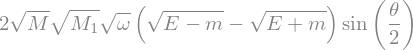

In [8]:
dec21=simplify(hep.dotprod4(hep.ubvw(ppr,1,pf,1),hep.ubuw(kf,1,ki,1)));dec21

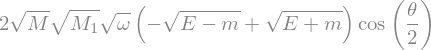

In [9]:
dec22=simplify(hep.dotprod4(hep.ubvw(ppr,1,pf,1),hep.ubuw(kf,-1,ki,1)));dec22

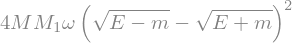

In [10]:
h2=simplify(dec21**2+dec22**2);h2

In [11]:
Tsq=simplify(h1+h2);Tsq

Until now we followed the line of arguments given in the bbok. With regard to the folowing discussion it is probably more instructive to use another order of the amplitudes. Call $F$ (Fermi) the squared amplitudes without spin flip of the nucleons and $GT$ (Gamow-Teller) the squared amplitudes with spin flip.

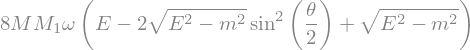

In [12]:
F=simplify(dec11**2+dec21**2);F

In [13]:
F=8*M*M1*(E+p*cos(theta));F

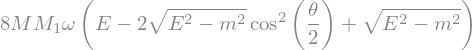

In [14]:
GT=simplify(dec12**2+dec22**2);GT

In [15]:
GT=8*M*M1*(E-p*cos(theta));GT

Summing, averaging and including the $G_F$ term yields
$$\overline{\sum_i}|T_i|^2=64G_F^2E\omega MM_1\enspace .$$
The differential decay rate for a three body decay is calculated from
$$\mathrm{d}\Gamma=\frac{1}{2M}\int|T_{{fi}}|^{2}\mathrm{d}L$$
with 
$$\mathrm{d}L=(2\pi)^{4}\delta^{4}(P-p_{1}-p_{2}-p_{3})\frac{\mathrm{d}^{3}p_{1}}{(2\pi)^{3}2E_{1}}\frac{\mathrm{d}^{3}p_{2}}{(2\pi)^{3}2E_{2}}\frac{\mathrm{d}^{3}p_{3}}{(2\pi)^{3}2E_{3}}\enspace.$$

In our case the formula for $\mathrm{d}\Gamma$ reduces to
$$\mathrm{d}\Gamma=\frac{4G_F^2}{(2\pi)^5}\int
\delta^{4}(k_i-p_{\rm out}-p_{f}-k_{f})\mathrm{d}^{3}p\mathrm{d}^{3}p_{f}
\mathrm{d}^{3}k_{f}\enspace .$$

The integral can be evaluated without discussing the contours of the Dalitzplot.
Integrating over $\mathrm{d}^{3}k_{f}$ uses up 3 dimensions of the $\delta$-function,
$$\mathrm{d}\Gamma=\frac{4G_F^2}{(2\pi)^5}\int
\delta(M-M_1-\omega-E)\mathrm{d}^{3}p\mathrm{d}^{3}p_{f}
\enspace .$$

Using $\mathrm{d}^{3}p_{f}=|\vec{p_f}|^2\mathrm{d}|\vec{p_f}|
\mathrm{d}\Omega=4\pi\omega^2\mathrm{d}\omega$ the $\mathrm{d}^{3}p_{f}$
integral is easily performed

$$\mathrm{d}\Gamma=\frac{8G_F^2}{(2\pi)^4}\int(M-M_1-E)^2
\mathrm{d}^{3}p=\frac{8G_F^2}{(2\pi)^3}\int(M-M_1-E)^2p^2
\mathrm{d}p\mathrm{d}\cos\theta
\enspace .$$

Finally using the abbreviation $M-M_1=\Delta$ the electron energy spectrum is given by

$$\frac{\mathrm{d}\Gamma}{\mathrm{d}p}=\frac{2G_F^2}{\pi^3}p^2(\Delta-E)^2
\enspace .$$

For massless electrons the total width is easily calculated:

In [16]:
Gam0=integrate(E**2*(Delta-E)**2,(E,0,Delta));Gam0

resulting in
$$\Gamma_0=\frac{G_F^2\Delta^5}{15\pi^3}\enspace ,$$

whereas the integral for finite $m$ looks ugly. 

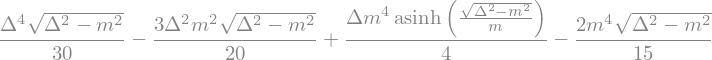

In [17]:
Gam=simplify(integrate(p**2*(Delta-sqrt(p**2+m**2))**2,
(p,0,sqrt(Delta**2-m**2))));Gam

numerical evaluation for neutron decay


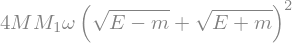

In [18]:
print('numerical evaluation for neutron decay')
h3=Gam.subs(m,0.511).subs(Delta,1.3) ;h1

numerical evaluation for neutron decay with m=0


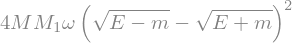

In [19]:
print('numerical evaluation for neutron decay with m=0')
h4=Gam0.subs(Delta,1.3);h2

In [20]:
print('Correction factor for neutron decay')
h3/h4

Correction factor for neutron decay


### 2) Hadronic neutron currents 
The resulting formula

$$\Gamma_0=0.476\frac{G_F^2\Delta^5}{15\pi^3}\enspace $$

is not in agreement with the measured neutron decay width. Leptonic weak currents differ from hadronic weak currents
$$\bar{u}(k_f)
\gamma^{\mu}\frac{1-\alpha\gamma^{5}}{2}u(k_i)\enspace ,$$
where $\alpha$ is a number ${\cal O}(1)$ to be taken from experiment.
Weak currents of the general form 
$$\bar{u}(k_f)
\gamma^{\mu}\frac{c_V-c_A\gamma^{5}}{2}u(k_i)\enspace ,$$
are also contained in heppackv0.py. $c_V$ and $c_A$, respectively $1$ and $\alpha=c_A/c_V$ 
have to be given as 5th and 6th argument

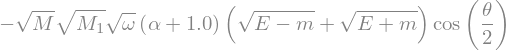

In [21]:
T11=simplify(hep.dotprod4(hep.ubvw(ppr,-1,pf,1),
hep.ubuva(kf,1,ki,1,1,alpha)));T11

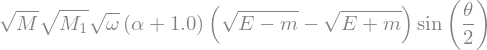

In [22]:
T12=simplify(hep.dotprod4(hep.ubvw(ppr,1,pf,1),
hep.ubuva(kf,1,ki,1,1,alpha)));T12

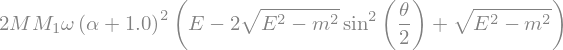

In [23]:
simplify(T11**2+T12**2)

In [24]:
F1=2*(1+alpha)**2*omega*M*M1*(E+p*cos(theta));F1

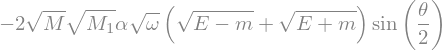

In [25]:
T21=simplify(hep.dotprod4(hep.ubvw(ppr,-1,pf,1),
hep.ubuva(kf,-1,ki,1,1,alpha)));T21

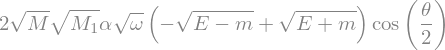

In [26]:
T22=simplify(hep.dotprod4(hep.ubvw(ppr,1,pf,1),
hep.ubuva(kf,-1,ki,1,1,alpha)));T22

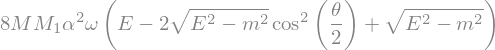

In [27]:
simplify(T21**2+T22**2)

In [28]:
GT1=8*omega*M*M1*alpha**2*(E-p*cos(theta));GT1

In [29]:
T31=simplify(hep.dotprod4(hep.ubvw(ppr,-1,pf,1),
hep.ubuva(kf,1,ki,-1,1,alpha)));T31

In [30]:
T32=simplify(hep.dotprod4(hep.ubvw(ppr,1,pf,1),
hep.ubuva(kf,1,ki,-1,1,alpha)));T32

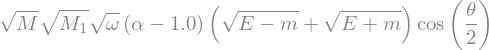

In [31]:
T41=simplify(hep.dotprod4(hep.ubvw(ppr,-1,pf,1),
hep.ubuva(kf,-1,ki,-1,1,alpha)));T41

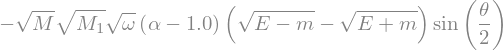

In [32]:
T42=simplify(hep.dotprod4(hep.ubvw(ppr,1,pf,1),
hep.ubuva(kf,-1,ki,-1,1,alpha)));T42

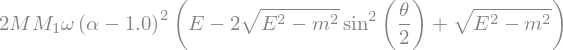

In [33]:
simplify(T41**2+T42**2)

In [34]:
F2=2*(1-alpha)**2*omega*M*M1*(E+p*cos(theta));F2

In [35]:
Tdecsq=simplify(F1+F2+GT1)/2;Tdecsq

Repeating the discussion above the evaluation of $\mathrm{d}\Gamma/\mathrm{d}p$ needs  a $\mathrm{d}\cos\theta$ integration.
With $\int_{-1}^1\cos\theta\mathrm{d}\cos\theta=0$ the formula for the momentum spectrum has simply to be multiplied by the ratio 
$$\frac{2E\omega MM_1(1+3\alpha^2)}{8E\omega MM_1}$$

of the average matrix elements squared with the result
$$\frac{\mathrm{d}\Gamma}{\mathrm{d}p}=\frac{G_F^2}{2\pi^3}
(1+3\alpha^2)p^2(\Delta-E)^2
\enspace .$$
and
$$\Gamma=0.476\frac{G_F^2\Delta^5}{60\pi^3}(1+3\alpha^2)\enspace $$

Finally taking the flavor structure of the weak currents into account the
neutron decay width is given by

$$\Gamma=0.476\frac{G_F^2\Delta^5}{60\pi^3}(1+3\alpha^2)
\cos^2\theta_{\rm C}\enspace , $$
where $\theta_{\rm C}$ is the Cabbibo angle.

### 3) Momentum spectrum and polarization of the decay electrons
In the next step the momentum spectrum with a normalization close to $1$ is plotted:

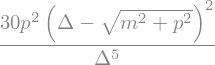

In [36]:
gamplot=p**2*(Delta-sqrt(p**2+m**2))**2*30/Delta**5;gamplot

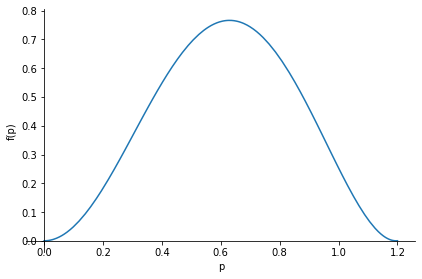

In [37]:
plot(gamplot.subs(m,0.511).subs(Delta,1.3),(p,0,1.2))

The average polarization of the decay electrons can simply be calculated from the matrix elements given in chapter 1.

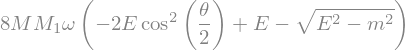

In [38]:
polF=simplify(dec21**2-dec11**2);polF

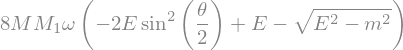

In [39]:
polGT=simplify(dec22**2-dec12**2);polGT

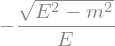

In [40]:
pol=simplify((polF+polGT)/Tsq);pol

therefore the polarization of the decay electrons is given by $-\beta_e$.